# TITANIC dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [8]:
train = pd.read_csv('train.csv')

In [9]:
test = pd.read_csv('test.csv')

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
titanic = [train, test]

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

---------------------------------------------------------------------------------
# Data preprocessing

Cathegorical data preprocessing: <br>
label = LabelEncoder()

Loop through train and test sample:
titanic = [train, test]

for data in titanic:
    data['...'].fillna(data['...'].median(), inplace = True)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Notes to data preprocessing:

1. Name, ticket, ID - not needed
2. Age, Embarked - Fill NA
3. Siblings + Parch - convert to 1 variable ? <br>
    -__sibsp__ Number of Siblings/Spouses Aboard <br>
    -__parch__ Number of Parents/Children Aboard
4. Sex, embarked - convert to dummy variables
5. Convert 'Fare' into cathegorical ?

## 1. Drop columns (Name, Ticket, Passenger ID)

In [14]:
# Try extracting title from Name before dropping it!

In [15]:
for data in titanic:
    data.drop(['PassengerId'],axis=1,inplace = True)
    data.drop(['Name'],axis=1,inplace = True)
    data.drop(['Ticket'],axis=1,inplace = True)    

In [16]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## 2. Fill missing values (Cabin, Age, Embarked, Fare (test) )

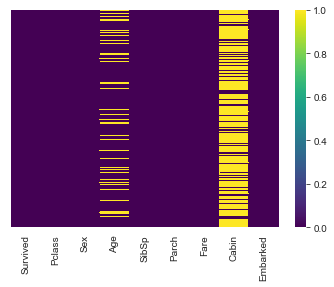

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [18]:
# Missing cabins: Unable to fill in, need to convert into boolean.
for data in titanic:
    data['Has_Cabin'] = data['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [19]:
for data in titanic:
    data.drop(['Cabin'],axis = 1, inplace = True)

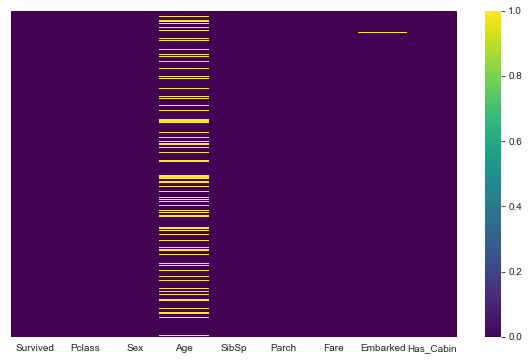

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass       418 non-null int64
Sex          418 non-null object
Age          332 non-null float64
SibSp        418 non-null int64
Parch        418 non-null int64
Fare         417 non-null float64
Embarked     418 non-null object
Has_Cabin    418 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [22]:
# Missing Age: What passenger class they belong to?

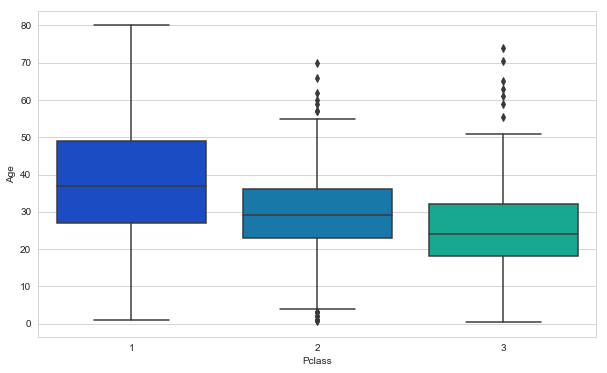

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train,x='Pclass',y='Age',palette='winter',)

In [24]:
#Easiest solution: fill median age:
for data in titanic:
    data['Age'].fillna(data['Age'].median(), inplace = True)

In [25]:
# Create 'Children' cathegory from Age or leave the algorithm to find out?

In [26]:
# Fill 2 missing 'Embarked' values:

In [27]:
train['Embarked'].mode()[0]

'S'

In [28]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [29]:
test['Fare'].fillna(test['Fare'].mode()[0], inplace = True)

## 3. Parch + Sibilings - to 'Family_size'

In [30]:
# Create 'Family_size' variable from 'Parch' and 'Sibsp'
for data in titanic:
    data['Family_size'] = 0
    data['Family_size'] = data['Parch'] + data['SibSp']

In [31]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Family_size
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,1
4,0,3,male,35.0,0,0,8.0500,S,0,0
5,0,3,male,28.0,0,0,8.4583,Q,0,0
6,0,1,male,54.0,0,0,51.8625,S,1,0
7,0,3,male,2.0,3,1,21.0750,S,0,4
8,1,3,female,27.0,0,2,11.1333,S,0,2
9,1,2,female,14.0,1,0,30.0708,C,0,1


In [32]:
for data in titanic:
    data.drop(['Parch','SibSp'], axis = 1, inplace = True)

In [33]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Family_size
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,1,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,1
4,0,3,male,35.0,8.0500,S,0,0
5,0,3,male,28.0,8.4583,Q,0,0
6,0,1,male,54.0,51.8625,S,1,0
7,0,3,male,2.0,21.0750,S,0,4
8,1,3,female,27.0,11.1333,S,0,2
9,1,2,female,14.0,30.0708,C,0,1


In [34]:
train.columns.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'Fare',
 'Embarked',
 'Has_Cabin',
 'Family_size']

## 4. Convert to dummy variables (Sex, Embarked)

In [35]:
# Convert Sex and Embarked into dummy variables

In [36]:
label = LabelEncoder()

In [37]:
for data in titanic:
    data ['Sex_Dummy'] = label.fit_transform(data['Sex'])
    data ['Embarked_Dummy'] = label.fit_transform(data['Embarked'])

In [38]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Family_size,Sex_Dummy,Embarked_Dummy
0,0,3,male,22.0,7.2500,S,0,1,1,2
1,1,1,female,38.0,71.2833,C,1,1,0,0
2,1,3,female,26.0,7.9250,S,0,0,0,2
3,1,1,female,35.0,53.1000,S,1,1,0,2
4,0,3,male,35.0,8.0500,S,0,0,1,2
5,0,3,male,28.0,8.4583,Q,0,0,1,1
6,0,1,male,54.0,51.8625,S,1,0,1,2
7,0,3,male,2.0,21.0750,S,0,4,1,2
8,1,3,female,27.0,11.1333,S,0,2,0,2
9,1,2,female,14.0,30.0708,C,0,1,0,0


In [39]:
for data in titanic:
    data.drop(['Sex','Embarked'], axis = 1, inplace = True)

In [40]:
# Standard feature scaling?

---------------------------------------------------------------------------------
## Standard scaling

Probably no need to scale since __'Fare'__ and __'Age'__ are not that far from each other.

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler() 

In [50]:
#for data in titanic:
train_rescaled = scaler.fit_transform(train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [90]:
train.head()

,Survived,Pclass,Age,Fare,Has_Cabin,Family_size,Sex_Dummy,Embarked_Dummy
0,0,3,22.0,7.2500,0,1,1,2
1,1,1,38.0,71.2833,1,1,0,0
2,1,3,26.0,7.9250,0,0,0,2
3,1,1,35.0,53.1000,1,1,0,2
4,0,3,35.0,8.0500,0,0,1,2


In [91]:
test.head()

,Pclass,Age,Fare,Has_Cabin,Family_size,Sex_Dummy,Embarked_Dummy
0,3,34.5,7.8292,0,0,1,1
1,3,47.0,7.0000,0,1,0,2
2,2,62.0,9.6875,0,0,1,1
3,3,27.0,8.6625,0,0,1,2
4,3,22.0,12.2875,0,2,0,2


Doesn't work here. Some issue with shape of the data. Need 2d data as input.

---------------------------------------------------------------------------------
## Model NN (Keras)

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [104]:
print(X_train.shape)
print(Y_train.shape)

(891, 7)
(891,)


In [120]:
X_train = train[['Pclass', 'Age', 'Fare', 'Has_Cabin', 'Family_size', 'Sex_Dummy', 'Embarked_Dummy']]
Y_train = train['Survived']
X_train.head()

,Pclass,Age,Fare,Has_Cabin,Family_size,Sex_Dummy,Embarked_Dummy
0,3,22.0,7.2500,0,1,1,2
1,1,38.0,71.2833,1,1,0,0
2,3,26.0,7.9250,0,0,0,2
3,1,35.0,53.1000,1,1,0,2
4,3,35.0,8.0500,0,0,1,2


In [137]:
model = Sequential()

In [138]:
model.add(Dense(7,activation='relu',input_dim = 7))

In [139]:
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [140]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [141]:
model.fit(X_train, Y_train, batch_size = 16, epochs = 100)

Epoch 1/100
891/891 [==============================] - 1s 799us/step - loss: 3.6957 - acc: 0.3659
Epoch 2/100
891/891 [==============================] - 0s 116us/step - loss: 1.6912 - acc: 0.3468
Epoch 3/100
891/891 [==============================] - 0s 97us/step - loss: 1.0488 - acc: 0.3715
Epoch 4/100
891/891 [==============================] - 0s 106us/step - loss: 0.7245 - acc: 0.5870
Epoch 5/100
891/891 [==============================] - 0s 97us/step - loss: 0.6730 - acc: 0.6465
Epoch 6/100
891/891 [==============================] - 0s 114us/step - loss: 0.6479 - acc: 0.6599
Epoch 7/100
891/891 [==============================] - 0s 110us/step - loss: 0.6343 - acc: 0.6846
Epoch 8/100
891/891 [==============================] - 0s 104us/step - loss: 0.6125 - acc: 0.6914
Epoch 9/100
891/891 [==============================] - 0s 100us/step - loss: 0.6073 - acc: 0.6835
Epoch 10/100
891/891 [==============================] - 0s 148us/step - loss: 0.5963 - acc: 0.6958
Epoch 11/100
891/891 

In [142]:
Y_test = model.predict(test)

In [143]:
Y_test = (Y_test > 0.5)

In [144]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_35 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 7         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [134]:
np.count_nonzero(Y_test)

192